For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

### Load data

In [2]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Closer look at the species info dataframe

Load data from csv into DataFrame

In [ ]:
species_info_df = pd.read_csv("species_info.csv")

Get the summary the dataframe

In [5]:
species_info_df.info()
species_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Analyze how many species there are in each category

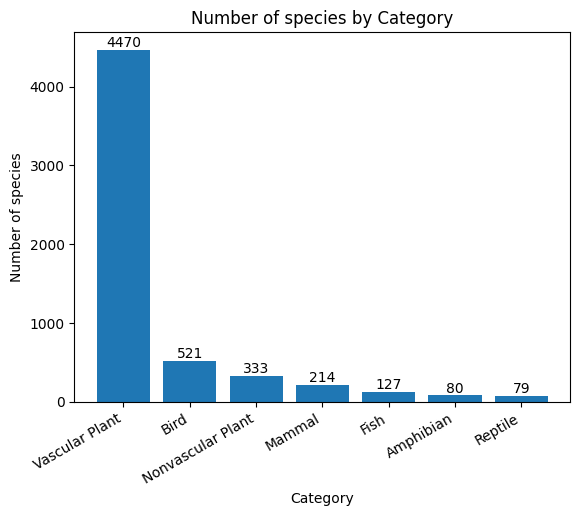

In [6]:
fig, ax = plt.subplots()
p = plt.bar(
    species_info_df["category"].value_counts().index, 
    species_info_df["category"].value_counts().values
    )
plt.xticks(rotation=30, ha="right")
plt.title("Number of species by Category")
plt.xlabel("Category")
plt.ylabel("Number of species")
ax.bar_label(p)
plt.show()

Find out about conservation status among species.

In [7]:
species_info_df["conservation_status"].value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

Group data by category and conservation status

In [21]:
conservation_status = species_info_df.groupby(by=["category", "conservation_status"]).size().reset_index(name="count")
conservation_status

,category,conservation_status,count
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,72
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Mammal,Endangered,7


In [ ]:
# Define a custom order for the conservation status
conservation_status_order = ["Species of Concern", "Endangered", "Threatened", "In Recovery"]

In [31]:
# Pivot the data for visiualization
pivot_data = conservation_status.pivot(index="category", columns="conservation_status", values="count").fillna(0)
pivot_data["total"] = pivot_data.sum(axis=1) # Add a total column for sorting
pivot_data = pivot_data.sort_values(by="total", ascending=False)
pivot_data = pivot_data.drop(columns=["total"])
pivot_data = pivot_data.reindex(columns=conservation_status_order, fill_value=0)
pivot_data

conservation_status,Species of Concern,Endangered,Threatened,In Recovery
category,,,,
Bird,72.0,4.0,0.0,3.0
Vascular Plant,43.0,1.0,2.0,0.0
Mammal,28.0,7.0,2.0,1.0
Fish,4.0,3.0,4.0,0.0
Amphibian,4.0,1.0,2.0,0.0
Nonvascular Plant,5.0,0.0,0.0,0.0
Reptile,5.0,0.0,0.0,0.0


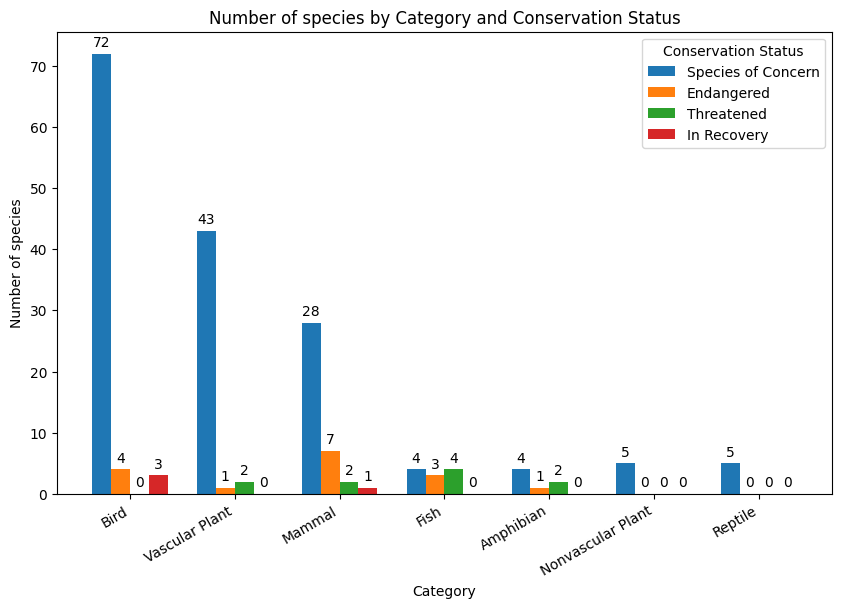

In [33]:
categories = pivot_data.index
statuses = pivot_data.columns
x = np.arange(len(categories))  # the label locations
width = 0.18  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, status in enumerate(statuses):
    ax.bar(x + i * width, pivot_data[status], width=width, label=status)
    ax.bar_label(ax.containers[i], padding=3)

plt.legend(title="Conservation Status")
plt.xticks(x + width * (len(statuses) - 1) / 2, categories, rotation=30, ha="right")
plt.xlabel("Category")
plt.ylabel("Number of species")
plt.title("Number of species by Category and Conservation Status")

plt.show()



### Closer look at the observations dataset

Load data from csv into DataFrame

In [ ]:
observations_df = pd.read_csv("observations.csv")

Inspect the summary of the dataframe

In [4]:
observations_df.info()
observations_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


What parks have the most biodiversity

In [43]:
observations_by_park = observations_df.groupby("park_name")["observations"].sum().sort_values(ascending=False).reset_index()
observations_by_park

,park_name,observations
0,Yellowstone National Park,1443562
1,Yosemite National Park,863332
2,Bryce National Park,576025
3,Great Smoky Mountains National Park,431820


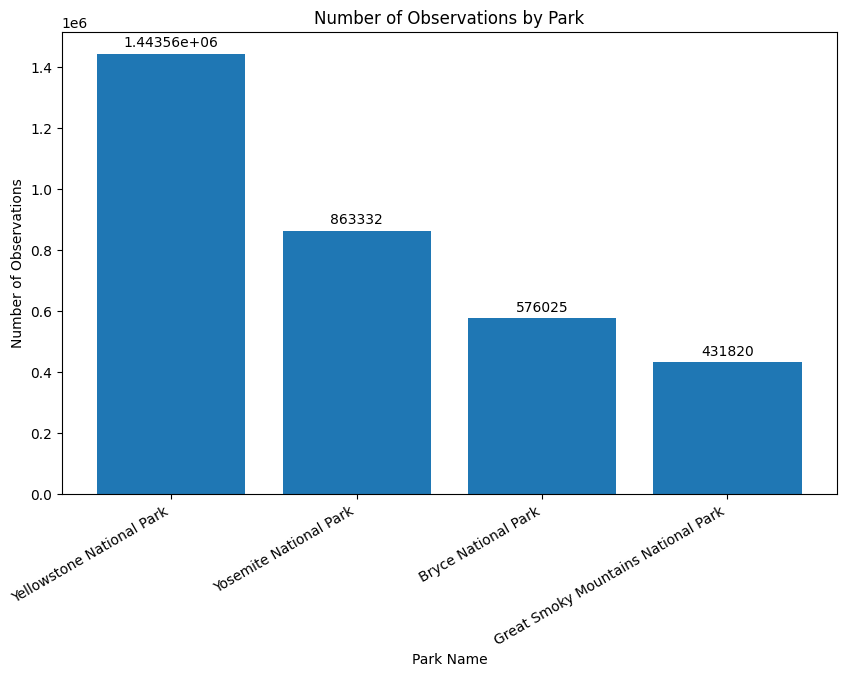

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(observations_by_park["park_name"]))
plt.bar(x, observations_by_park["observations"])
plt.xticks(x, observations_by_park["park_name"], rotation=30, ha="right")
plt.xlabel("Park Name")
plt.ylabel("Number of Observations")
plt.title("Number of Observations by Park")
ax.bar_label(ax.containers[0], padding=3)
plt.show()